In [1]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Girija Joshi\anaconda3\envs\

In [2]:
# Load data
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [3]:
# Generate our categorical variable list
charity_clean_df = charity_df.drop(columns=["EIN","NAME"])
charity_clean_cat = charity_clean_df.dtypes[charity_clean_df.dtypes == "object"].index.tolist()
charity_clean_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [4]:
# Check the number of unique values in each column
charity_clean_df[charity_clean_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [5]:
# Check the unique value counts to see if binning is required
class_counts = charity_clean_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C1728        1
C1580        1
C1236        1
C2500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

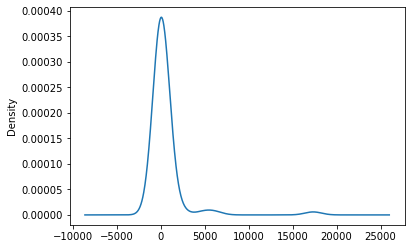

In [6]:
# Visualize the value counts
class_counts.plot.density()

In [7]:
# Determine which values to replace
replace_classes = list(class_counts[class_counts < 1000].index)
replace_classes

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C1720',
 'C4100',
 'C2400',
 'C1600',
 'C1257',
 'C2710',
 'C0',
 'C1260',
 'C1246',
 'C3200',
 'C1267',
 'C1234',
 'C1256',
 'C2380',
 'C4120',
 'C2600',
 'C1732',
 'C6100',
 'C3700',
 'C1248',
 'C1570',
 'C5200',
 'C4500',
 'C1283',
 'C2570',
 'C1245',
 'C1820',
 'C2150',
 'C4200',
 'C8210',
 'C2170',
 'C2561',
 'C1370',
 'C2190',
 'C1900',
 'C1728',
 'C1580',
 'C1236',
 'C2500']

In [8]:
# Replace in DataFrame
for classes in replace_classes:
    charity_clean_df.CLASSIFICATION = charity_clean_df.CLASSIFICATION.replace(classes,"Other")
# Check to make sure binning was successful
charity_clean_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
charity_clean_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [10]:
# check for valyes of APPLICATION_TYPE
app_type_counts = charity_clean_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

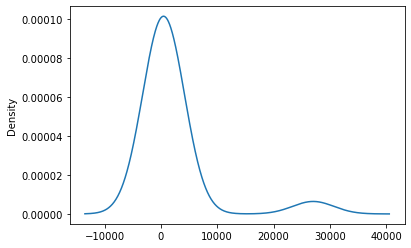

In [11]:
app_type_counts.plot.density()

In [12]:
# keep only useful information
app_type_replaced = list(app_type_counts[app_type_counts < 500].index)

In [13]:
# Replace in DataFrame
for app_type in app_type_replaced:
    charity_clean_df.APPLICATION_TYPE = charity_clean_df.APPLICATION_TYPE.replace(app_type,"Other")
# Check to make sure binning was successful
charity_clean_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_clean_df[charity_clean_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_clean_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [15]:
# Merge one-hot encoded features and drop the originals
charity_clean_df = charity_clean_df.merge(encode_df,left_index=True, right_index=True)
charity_clean_df = charity_clean_df.drop(charity_clean_cat,1)
charity_clean_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [16]:
charity_clean_df.shape

(34299, 44)

In [17]:
# keep data with only active status
charity_clean_df = charity_clean_df[charity_clean_df.STATUS == 1]

In [18]:
charity_clean_df.shape

(34294, 44)

In [19]:
# create X and y
y = charity_clean_df['IS_SUCCESSFUL'].values
X = charity_clean_df.drop(["IS_SUCCESSFUL","STATUS"], 1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  len(X_train[0])
hidden_nodes_layer2 = len(X_train[0]) // 2
no_epochs = 100

In [22]:
# create a instace of - 1
tf.keras.backend.clear_session()
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu')
)

# Second Layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu')
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the tructure of model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                1806      
_________________________________________________________________
dense_1 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 22        
Total params: 2,731
Trainable params: 2,731
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model by fit
fit_model = nn.fit(X_train_scaled, y_train, epochs=no_epochs)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)


Epoch 1/100
25720/25720 [==============================] - 2s 59us/sample - loss: 0.5785 - accuracy: 0.7151
Epoch 2/100
25720/25720 [==============================] - 1s 56us/sample - loss: 0.5567 - accuracy: 0.7288
Epoch 3/100
25720/25720 [==============================] - 2s 68us/sample - loss: 0.5541 - accuracy: 0.7301
Epoch 4/100
25720/25720 [==============================] - 2s 63us/sample - loss: 0.5518 - accuracy: 0.7326
Epoch 5/100
25720/25720 [==============================] - 2s 63us/sample - loss: 0.5502 - accuracy: 0.7336
Epoch 6/100
25720/25720 [==============================] - 2s 85us/sample - loss: 0.5491 - accuracy: 0.7334
Epoch 7/100
25720/25720 [==============================] - 2s 69us/sample - loss: 0.5479 - accuracy: 0.7338
Epoch 8/100
25720/25720 [==============================] - 2s 61us/sample - loss: 0.5481 - accuracy: 0.7341s - loss: 0
Epoch 9/100
25720/25720 [==============================] - 2s 69us/sample - loss: 0.5476 - accuracy: 0.7343
Epoch 10/100
2572

25720/25720 [==============================] - 4s 146us/sample - loss: 0.5380 - accuracy: 0.7386
Epoch 76/100
25720/25720 [==============================] - 4s 139us/sample - loss: 0.5378 - accuracy: 0.7390
Epoch 77/100
25720/25720 [==============================] - 4s 150us/sample - loss: 0.5375 - accuracy: 0.7414
Epoch 78/100
25720/25720 [==============================] - 3s 122us/sample - loss: 0.5377 - accuracy: 0.7401
Epoch 79/100
25720/25720 [==============================] - 3s 136us/sample - loss: 0.5379 - accuracy: 0.7395
Epoch 80/100
25720/25720 [==============================] - 4s 144us/sample - loss: 0.5373 - accuracy: 0.7407
Epoch 81/100
25720/25720 [==============================] - 3s 121us/sample - loss: 0.5376 - accuracy: 0.7402
Epoch 82/100
25720/25720 [==============================] - 4s 168us/sample - loss: 0.5376 - accuracy: 0.7389
Epoch 83/100
25720/25720 [==============================] - 3s 109us/sample - loss: 0.5371 - accuracy: 0.7402
Epoch 84/100
25720/2572

In [24]:
print(f"First model with 2 layers \nLoss: {model_loss}, Accuracy: {model_accuracy}")

First model with 2 layers 
Loss: 0.5548782812734292, Accuracy: 0.7292978763580322


In [25]:
# create a instace of 2
tf.keras.backend.clear_session()
nn1 = tf.keras.models.Sequential()
# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='tanh')
)

# Second Layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh')
)

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the tructure of model
nn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                1806      
_________________________________________________________________
dense_1 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 22        
Total params: 2,731
Trainable params: 2,731
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the Sequential model together and customize metrics
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model by fit
fit_model = nn1.fit(X_train_scaled, y_train, epochs=no_epochs)

# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)


Epoch 1/100
25720/25720 [==============================] - 2s 69us/sample - loss: 0.5754 - accuracy: 0.7153s - loss: 0.5771 - 
Epoch 2/100
25720/25720 [==============================] - 2s 64us/sample - loss: 0.5578 - accuracy: 0.7291
Epoch 3/100
25720/25720 [==============================] - 1s 54us/sample - loss: 0.5542 - accuracy: 0.7307
Epoch 4/100
25720/25720 [==============================] - 1s 51us/sample - loss: 0.5516 - accuracy: 0.7327
Epoch 5/100
25720/25720 [==============================] - 1s 49us/sample - loss: 0.5506 - accuracy: 0.7331
Epoch 6/100
25720/25720 [==============================] - 1s 53us/sample - loss: 0.5495 - accuracy: 0.7320
Epoch 7/100
25720/25720 [==============================] - 2s 59us/sample - loss: 0.5482 - accuracy: 0.7325
Epoch 8/100
25720/25720 [==============================] - 2s 91us/sample - loss: 0.5475 - accuracy: 0.7335
Epoch 9/100
25720/25720 [==============================] - 3s 106us/sample - loss: 0.5472 - accuracy: 0.7348
Epoch 10

25720/25720 [==============================] - 2s 65us/sample - loss: 0.5358 - accuracy: 0.7408
Epoch 76/100
25720/25720 [==============================] - 1s 58us/sample - loss: 0.5358 - accuracy: 0.7399
Epoch 77/100
25720/25720 [==============================] - 1s 57us/sample - loss: 0.5355 - accuracy: 0.7411
Epoch 78/100
25720/25720 [==============================] - 1s 58us/sample - loss: 0.5358 - accuracy: 0.7411
Epoch 79/100
25720/25720 [==============================] - 1s 53us/sample - loss: 0.5357 - accuracy: 0.7399
Epoch 80/100
25720/25720 [==============================] - 2s 64us/sample - loss: 0.5355 - accuracy: 0.7406
Epoch 81/100
25720/25720 [==============================] - 1s 57us/sample - loss: 0.5355 - accuracy: 0.7400
Epoch 82/100
25720/25720 [==============================] - 1s 52us/sample - loss: 0.5351 - accuracy: 0.7401
Epoch 83/100
25720/25720 [==============================] - 1s 51us/sample - loss: 0.5354 - accuracy: 0.7408
Epoch 84/100
25720/25720 [======

In [27]:
print(f"Second model with 2 layers\nLoss: {model_loss}, Accuracy: {model_accuracy}")

Second model with 2 layers
Loss: 0.553420799093311, Accuracy: 0.7269652485847473


Model Optimization with 3 layers and dropout and output activation changed

In [28]:
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  len(X_train[0])
hidden_nodes_layer2 = len(X_train[0])

# create a instace of 3
tf.keras.backend.clear_session()
nn3 = tf.keras.models.Sequential()
# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu')
)

nn3.add(tf.keras.layers.Dropout(0.2))
# Second Layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh')
)

nn3.add(tf.keras.layers.Dropout(0.3))
# Third Layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu')
)

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation='tanh'))

# Check the tructure of model
nn3.summary()

sgd = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
# Compile the Sequential model together and customize metrics
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model by fit
fit_model = nn3.fit(X_train_scaled, y_train, epochs=no_epochs)

# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                1806      
_________________________________________________________________
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 42)                1806      
_________________________________________________________________
dropout_1 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 43        
Total params: 5,461
Trainable params: 5,461
Non-trainable params: 0
______________________________________________________

25720/25720 [==============================] - 2s 78us/sample - loss: 0.5556 - accuracy: 0.7329
Epoch 66/100
25720/25720 [==============================] - 2s 75us/sample - loss: 0.5532 - accuracy: 0.7321
Epoch 67/100
25720/25720 [==============================] - 2s 71us/sample - loss: 0.5519 - accuracy: 0.7332
Epoch 68/100
25720/25720 [==============================] - 2s 72us/sample - loss: 0.5516 - accuracy: 0.7333
Epoch 69/100
25720/25720 [==============================] - 2s 76us/sample - loss: 0.5516 - accuracy: 0.7349
Epoch 70/100
25720/25720 [==============================] - 2s 74us/sample - loss: 0.5535 - accuracy: 0.7343
Epoch 71/100
25720/25720 [==============================] - 2s 76us/sample - loss: 0.5564 - accuracy: 0.7335
Epoch 72/100
25720/25720 [==============================] - 2s 79us/sample - loss: 0.5564 - accuracy: 0.7335
Epoch 73/100
25720/25720 [==============================] - 2s 71us/sample - loss: 0.5550 - accuracy: 0.7339
Epoch 74/100
25720/25720 [======

In [29]:
print(f"Third model with 3 layers\nLoss: {model_loss}, Accuracy: {model_accuracy}")

Third model with 3 layers
Loss: 0.5646687589424152, Accuracy: 0.7294145226478577
